In [2]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the dataset from the text file
dataset_path = r'C:\Users\nikhil kumar\OneDrive\Desktop\Cyfuture\train_snli.txt'  # Replace with your file path
data = pd.read_csv(dataset_path, sep="\t", header=None, names=["text1", "text2", "label"])

In [4]:
data.head()

,text1,text2,label
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
2,Children smiling and waving at camera,There are children present,1
3,Children smiling and waving at camera,The kids are frowning,0
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0


In [5]:
# Convert labels to integer
data['label'] = data['label'].astype(int)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367373 entries, 0 to 367372
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text1   367373 non-null  object
 1   text2   367369 non-null  object
 2   label   367373 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ MB


In [7]:
# Check for NaN values in each column
print(data.isnull().sum())

text1    0
text2    4
label    0
dtype: int64


In [8]:
data['text2'] = data['text2'].fillna('')  # Fill NaN in 'text2'

In [9]:
print(data.isnull().sum())

text1    0
text2    0
label    0
dtype: int64


In [11]:
# Text preprocessing and vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_text1 = vectorizer.fit_transform(data['text1'])
tfidf_text2 = vectorizer.transform(data['text2'])

In [12]:

# Combine features (absolute difference + cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = [
    cosine_similarity(tfidf_text1[i], tfidf_text2[i])[0][0] 
    for i in range(tfidf_text1.shape[0])
]
features = abs(tfidf_text1 - tfidf_text2)
features_with_cosine = hstack([features, pd.DataFrame(cosine_similarities).values])


In [13]:
# Step 6: Train-Test Split
#X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_with_cosine, data['label'], test_size=0.2, random_state=42)

In [14]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7796937733923103
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78     36795
           1       0.77      0.80      0.78     36680

    accuracy                           0.78     73475
   macro avg       0.78      0.78      0.78     73475
weighted avg       0.78      0.78      0.78     73475



In [16]:
# Test with custom inputs
sample_text1 = "A man and a woman cross the street in front of a pizza and gyro restaurant."
sample_text2 = "The people are standing still on the curb."
sample_vector1 = vectorizer.transform([sample_text1])
sample_vector2 = vectorizer.transform([sample_text2])
sample_features = abs(sample_vector1 - sample_vector2)
sample_cosine_similarity = cosine_similarity(sample_vector1, sample_vector2)[0][0]
sample_features_with_cosine = hstack([sample_features, [[sample_cosine_similarity]]])
sample_prediction = rf_model.predict(sample_features_with_cosine)

print(f"Prediction: {'Plagiarized' if sample_prediction[0] == 1 else 'Not Plagiarized'}")

Prediction: Not Plagiarized


In [18]:
# Step 9: Test the Model with Custom Input
def predict_plagiarism(text1, text2):
    # Transform the custom input using the TF-IDF vectorizer
    vector1 = tfidf_vectorizer.transform([text1])


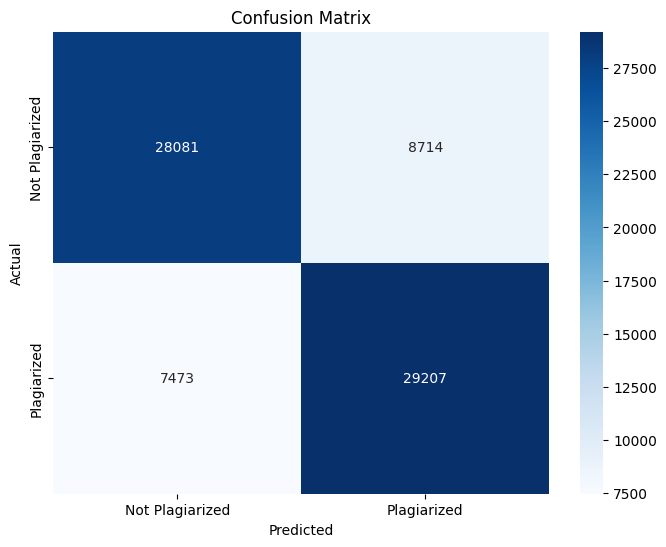

In [19]:
# prompt: print  confysion matrrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Plagiarized', 'Plagiarized'],
            yticklabels=['Not Plagiarized', 'Plagiarized'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 1, 'solver': 'liblinear'}
